# Research Methods - Assignment 1

- André Santos
- Luís Espírito Santo
- Miguel Guerreiro

In [ ]:
!pip -q install ipympl

     |████████████████████████████████| 507 kB 4.2 MB/s 


In [ ]:
#%matplotlib widget
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import ipywidgets as widgets
import math

from matplotlib.animation import FuncAnimation, PillowWriter 
from matplotlib import cm

from mpl_toolkits import mplot3d
from google.colab import output
output.enable_custom_widget_manager()

## Read Data

In [ ]:
def read_data(filename):
  df = pd.read_csv("measurements_v2.csv", index_col=0)
  df.describe()
  #Defining extra columns
  df["code"] = np.where(df["Time_code1"].isnull(), "Code2", "Code1" )
  df["time"] = np.where(df["code"] == "Code1", df["Time_code1"], df["Time_code2"])
  df["time_log"] = np.log(df["time"])
  df["edges"] = df["Percentage"]*(df["Exams"]**2-df["Exams"])//2
  return df

,Exams,Percentage,Seed1,Seed2,Solution_code1,Time_code1,Solution_code2,Time_code2
count,108640.000000,108640.000000,108640.000000,108640.000000,54320.000000,54320.000000,54320.000000,54320.000000
mean,11.971649,0.498079,1327.499816,31237.499926,4.397938,6.256752,4.428258,6.339705
std,4.306179,0.290566,1.707761,1.707847,2.511104,40.195182,2.469961,40.438020
min,5.000000,0.000000,1325.000000,31235.000000,-1.000000,0.000004,-1.000000,0.000003
25%,8.000000,0.250000,1326.000000,31236.000000,3.000000,0.000025,3.000000,0.000009
50%,12.000000,0.500000,1327.000000,31237.000000,4.000000,0.000090,4.000000,0.000042
75%,16.000000,0.750000,1329.000000,31239.000000,6.000000,0.001042,6.000000,0.001021
max,19.000000,1.000000,1330.000000,31240.000000,13.000000,300.000004,13.000000,300.000015


# Test Hipothesis

In [ ]:
!pip install --upgrade scipy
import scipy.stats as stats
import seaborn as sns

     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


## Hipothesis 1

For $p=0.75$ and $n=15$, we achieve similar runtimes by either using Code 1 or Code 2. We use the following 

$$ H_0 : \mu_{t_1} - \mu_{t_2} = 0 $$
$$ H_1 : \mu_{t_1} - \mu_{t_2} \neq 0 $$

### Read Data

In [ ]:
!gdown --id 14JNDxrBMdbWjGM4dbXUwnJY1zA9E2GSe

In [ ]:
df = read_data("measurements_h1.csv")

### Test

In [ ]:
m1_table = df.loc[df.loc[:, "Exams"] == 15]
m1_table = m1_table.loc[df.loc[:, "Percentage"] == 0.75]

0.051410305555555556

In [ ]:
sample_code1 = m1_table.loc[np.logical_not(np.isnan(m1_table.loc[: ,"Time_code1"])),"Time_code1"].to_numpy()
sample_code2 = m1_table.loc[np.logical_not(np.isnan(m1_table.loc[: ,"Time_code2"])),"Time_code2"].to_numpy()

In [ ]:
sample_code1

array([1.01200e-03, 6.15000e-04, 8.70800e-03, 3.85400e-03, 3.98000e-04,
       3.52000e-04, 6.17600e-03, 1.08410e-02, 2.14100e-03, 1.80130e-02,
       1.32830e-02, 1.53300e-03, 1.80400e-03, 6.11900e-03, 2.23290e-02,
       1.94500e-03, 3.21120e-02, 1.84200e-03, 4.00690e-01, 5.44270e-02,
       4.36150e-02, 2.17832e-01, 2.02800e-02, 1.65267e-01, 5.87490e-02,
       2.83820e-02, 2.43350e-02, 4.64723e-01, 2.70040e-02, 5.51610e-02,
       7.81900e-03, 6.14800e-03, 1.28580e-02, 1.05790e-02, 3.28250e-02,
       3.13700e-03])

In [ ]:
stats.ttest_ind(sample_code1, sample_code2)

Ttest_indResult(statistic=-0.09255004294088098, pvalue=0.9265254009326721)

### Result

## Hipothesis 2

For the same problem generated with $p=0$, Code 1 will take consistently longer time to solve than Code 2. Let $t^{(1)}_1, t^{(2)}_1, t^{(3)}_1 \ldots t^{(n)}_1$ be measurements for Code 1 and $t^{(1)}_2, t^{(2)}_2, t^{(3)}_2 \ldots t^{(n)}_2$ measurements for Code 2. Let $d_k = t^{(k)}_1 - t^{(k)}_2$, 

$$ H_0 : \mu_d \leq 0 $$
$$ H_1 : \mu_d > 0 $$

### Read Data

In [ ]:
!gdown --id 14JNDxrBMdbWjGM4dbXUwnJY1zA9E2GSe

In [ ]:
df = read_data("measurements_h1.csv")

### Test

In [ ]:
p_table = df.pivot_table(values="time", index=["Exams", "Percentage", "Seed1", "Seed2"], columns='code', aggfunc='first')

In [ ]:
p_table_a = p_table.loc[[tuple(row) for index, row in df.loc[:,["Exams", "Percentage", "Seed1", "Seed2"]].iterrows()]].reset_index()

In [ ]:
df.loc[:, "time_difference"] = (p_table_a['Code1'] - p_table_a['Code2'])

In [ ]:
df

,Exams,Percentage,Seed1,Seed2,Solution_code1,Time_code1,Solution_code2,Time_code2,code,time,time_log,edges,time_difference
0,5,0.00,1325,31235,1.0,0.000009,NaN,NaN,Code1,0.000009,-11.618286,0.0,0.000005
1,5,0.00,1325,31236,1.0,0.000009,NaN,NaN,Code1,0.000009,-11.618286,0.0,0.000005
2,5,0.00,1325,31237,1.0,0.000008,NaN,NaN,Code1,0.000008,-11.736069,0.0,0.000004
3,5,0.00,1325,31238,1.0,0.000008,NaN,NaN,Code1,0.000008,-11.736069,0.0,0.000005
4,5,0.00,1325,31239,1.0,0.000020,NaN,NaN,Code1,0.000020,-10.819778,0.0,0.000016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
108635,19,0.94,1329,31238,NaN,NaN,-1.0,300.000001,Code2,300.000001,5.703782,160.0,0.000000
108636,19,0.94,1329,31239,NaN,NaN,-1.0,300.000001,Code2,300.000001,5.703782,160.0,0.000000
108637,19,0.94,1329,31240,NaN,NaN,-1.0,300.000001,Code2,300.000001,5.703782,160.0,0.000000
108638,19,0.94,1330,31235,NaN,NaN,-1.0,300.000001,Code2,300.000001,5.703782,160.0,0.000000


In [ ]:
td = np.array(df[df["Percentage"]==0]["time_difference"][:])

stats.ttest_1samp(td, popmean=0, alternative="greater")

Ttest_1sampResult(statistic=46.56943596281992, pvalue=9.78956140217115e-261)

### Result
- Em qualquer um dos niveis de significância $0.1$, $0.05$, $0.01$ podemos rejeitar a hipótese nula. O que reforça as nossas supspeitas de que o Code1 demora consistentemente mais que o Code2.


In [ ]:
np.mean(df.loc[:, "time_difference"]), np.std(df.loc[:, "time_difference"])

(-0.08295296750736028, 0.8417792311392166)

## Hipothesis 3

The linear model we computed from previously collected data is a good model for predicting the runtime of Code 2 for $p=1$ and given $n$.   
Our model is $y(n)=-21.89+1.92n$. Let $t^{(1)}_1, t^{(2)}_1, t^{(3)}_1 \ldots t^{(m)}_1$ be measurements for Code 2 with $n^{(1)}, n^{(2)}, n^{(3)} \ldots n^{(m)}$ exams. Let $e^k = t^k - y(n^k)$ be the model error, $e \sim N (\mu_e,\sigma_e^2)$:

$$ H_0 : \mu_e = 0 $$
$$ H_1 : \mu_e \neq 0 $$

### Read Data

In [ ]:
!gdown --id 14JNDxrBMdbWjGM4dbXUwnJY1zA9E2GSe

In [ ]:
df = read_data("measurements_h3.csv")

### Test

In [ ]:
df

,Exams,Percentage,Seed1,Seed2,Solution_code1,Time_code1,Solution_code2,Time_code2,code,time,time_log,edges
0,5,0.00,1325,31235,1.0,0.000009,NaN,NaN,Code1,0.000009,-11.618286,0.0
1,5,0.00,1325,31236,1.0,0.000009,NaN,NaN,Code1,0.000009,-11.618286,0.0
2,5,0.00,1325,31237,1.0,0.000008,NaN,NaN,Code1,0.000008,-11.736069,0.0
3,5,0.00,1325,31238,1.0,0.000008,NaN,NaN,Code1,0.000008,-11.736069,0.0
4,5,0.00,1325,31239,1.0,0.000020,NaN,NaN,Code1,0.000020,-10.819778,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
108635,19,0.94,1329,31238,NaN,NaN,-1.0,300.000001,Code2,300.000001,5.703782,160.0
108636,19,0.94,1329,31239,NaN,NaN,-1.0,300.000001,Code2,300.000001,5.703782,160.0
108637,19,0.94,1329,31240,NaN,NaN,-1.0,300.000001,Code2,300.000001,5.703782,160.0
108638,19,0.94,1330,31235,NaN,NaN,-1.0,300.000001,Code2,300.000001,5.703782,160.0


In [ ]:
df.loc[:, "y(n)"] = (-21.898 + 1.92*df["Exams"])
df.loc[:, "e"] = df["time_log"] - df["y(n)"]

In [ ]:
df.loc[(df["Percentage"] == 1.00) & (df["code"] == "Code2"), "e"]

57920     0.880385
57921     0.967396
57922     0.880385
57923     0.880385
57924     0.967396
            ...   
105219   -6.958218
105220   -6.958218
105221   -6.958218
105222   -6.958218
105223   -6.958218
Name: e, Length: 504, dtype: float64

In [ ]:
en = df.loc[(df["Percentage"] == 1.00) & (df["code"] == "Code2") & (df["Exams"] <= 14), ["e", "Exams"]]
e = en["e"]
n = en["Exams"]
en

57920    0.880385
57921    0.967396
57922    0.880385
57923    0.880385
57924    0.967396
           ...   
90675    0.721782
90676    0.721782
90677    0.721782
90678    0.721782
90679    0.721782
Name: e, Length: 360, dtype: float64

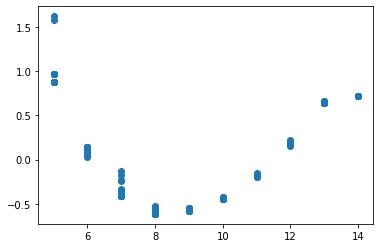

In [ ]:
plt.scatter(n, e)

In [ ]:
stats.ttest_1samp(e, popmean=0)

Ttest_1sampResult(statistic=1.5043401935003853, pvalue=0.133373025381194)

### Result

Em qualquer um dos niveis de significância $0.1$, $0.05$, $0.01$ podemos rejeitar a hipótese nula. No entanto, se permitirmos um nível de significância de 0.15, isso já não se verifica e portanto, para este nível de significância, não podemos dizer que o nosso modelo linear não é um bom modelo para prever o tempo de execução para o Code2 para $p = 1.0$

